# Project: Factors associated with patients showing up for a scheduled appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project seeks to analyse the no show appointment dataset. The project seeks to investigate factors associated with patients honouring their scheduled appointment or not. 

Project question: What is the relationship between the age, gender, diabetes status, and receipt of sms with patients showing up or not showing up for their scheduled appointment?

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
#Import dataset
df = pd.read_csv("data/noshowappointments.csv")

# The first five rows in the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The above shows the first five rows of the dataset. This is done to have an initial view of the dataset. This also allows to assess the dataset visually.

In [5]:
df.shape

(110527, 14)

The dataset has 110527 observations and 14 variables. The shape was inspected to assess the dimensions of the dataset.

In [6]:
df.info() # Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset has 14 variables with no missing data. Patient id is represented as a float data type. Appointment id, age, scholarship, hypertension, diabetes, alcoholism, handcap, sms received are represented as integer data types. Gender, scheduled day, appointment day, neighbourhood, and no show are represented as object data types.

In [7]:
df.duplicated().sum() #Check for duplicates

0

There are no duplicates in the dataset as shown above. 

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The describe function produces summary statistics for the above variables. However, only the summary for age is intuitive. The other variables have wrong data types and with conversion will help to solve the presentation of the summary statistics. Age has a minimum age of -1 which is not likely. This will be solved at the next section.

### Data Cleaning (Drop columns, Convert data types into appropriate types, clean column names, and drop inaccurate age values)

In [9]:
# Function to clean dataset
def clean(df):
    # Drop columns
    df.drop(["PatientId", "AppointmentID","ScheduledDay", "Neighbourhood",
    "AppointmentDay","Scholarship","Hipertension","Alcoholism","Handcap"],
    axis=1, inplace=True)
    # Convert the SMS data type to an object
    df["SMS_received"]= df.SMS_received.astype(object)
    # Convert diabetes data type to an object
    df["Diabetes"]= df.Diabetes.astype(object)
    # Convert variable names to lower case for consistency and hyphens for underscores
    df.columns = df.columns.str.lower().str.replace("-","_")
    # Masking to drop age reported as 0 and less than 0
    drop_age = df["age"] >= 1
    # Drop individuals with age less or equal to 0
    df = df[drop_age]

In [10]:
# Clean dataframe
clean(df)

In [11]:
# Inspect first five rows
df.head()

,gender,age,diabetes,sms_received,no_show
0,F,62,0,0,No
1,M,56,0,0,No
2,F,62,0,0,No
3,F,8,0,0,No
4,F,56,1,0,No


In [13]:
df.dtypes # Confirm the datatypes in the dataset

gender          object
age              int64
diabetes        object
sms_received    object
no_show         object
dtype: object

### Data cleaning summary

Data cleaning the dataset involved dropping the columns that were not necessary for the research questions namely "PatientId", "AppointmentID","ScheduledDay", "Neighbourhood", "AppointmentDay","Scholarship","Hipertension","Alcoholism",and "Handcap". 

"SMS received" and "Diabetes" variables were converted from integers to objects. This is because these variables are categorical variables. 

Column names were converted to lower cases and the hyphen in the "no-show" variable was converted to an underscore to make the column name consistent with the other column names.

The "age" variable had values less or equal to 0 which was considered inaccurate data. These were also removed.

<a id='eda'></a>
## Exploratory Data Analysis


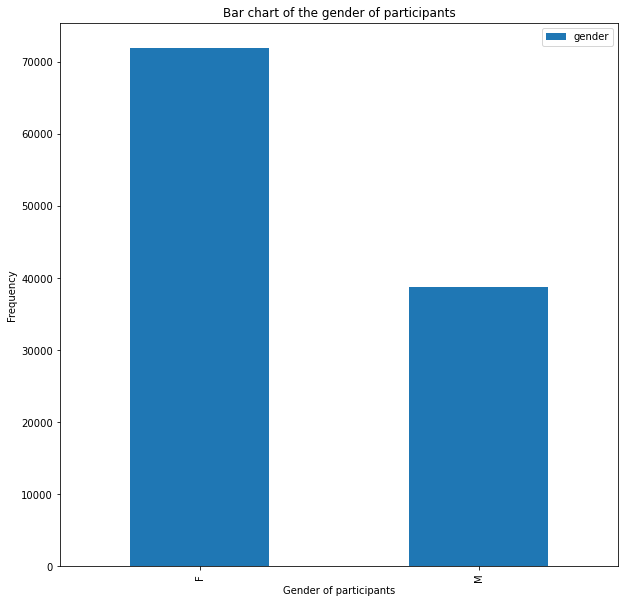

In [30]:
df["gender"].value_counts().plot.bar(figsize=(10,10))
plt.xlabel("Gender of patients")
plt.ylabel("Frequency")
plt.title("Bar chart of the gender of participants")
plt.legend();

The above distribution shows that there are more females in this sample than males.

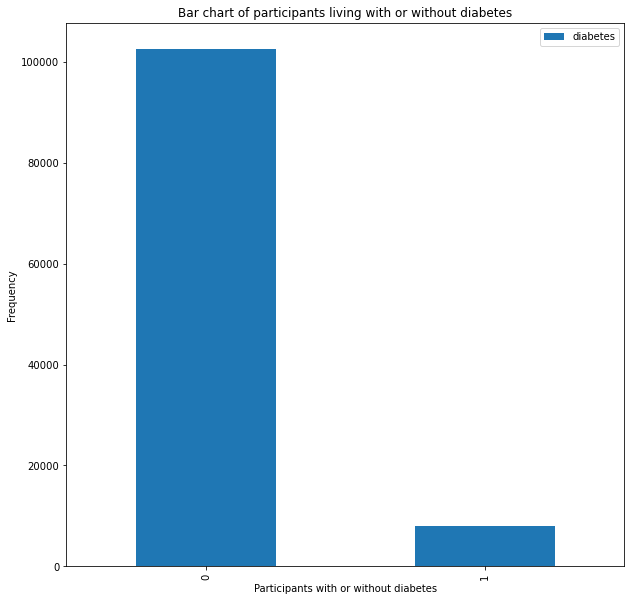

In [31]:
df["diabetes"].value_counts().plot.bar(figsize=(10,10))
plt.xlabel("Patients with or without diabetes")
plt.ylabel("Frequency")
plt.title("Bar chart of patients living with or without diabetes")
plt.legend();

Majority of participants who are scheduled for appointment did not have diabetes.

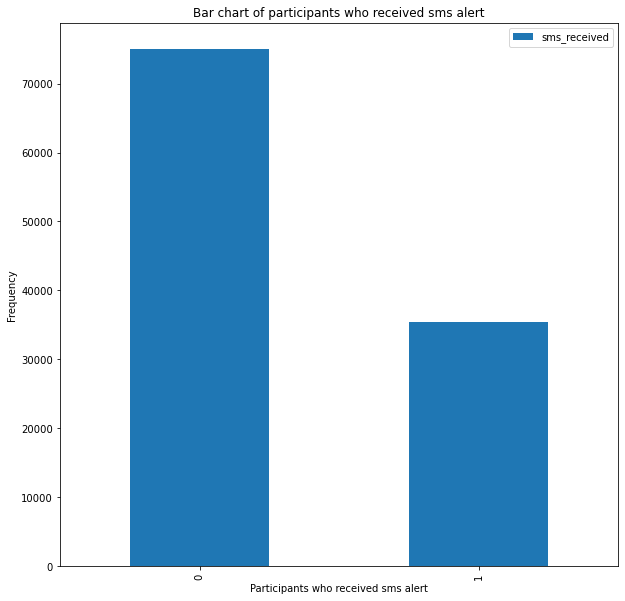

In [32]:
df["sms_received"].value_counts().plot.bar(figsize=(10,10))
plt.xlabel("Patients who received sms alert")
plt.ylabel("Frequency")
plt.title("Bar chart of patients who received sms alert")
plt.legend();

The number of patients who received an sms alert were less than 40,000 compared to over 70,000 of patients who did not receive an sms alert.

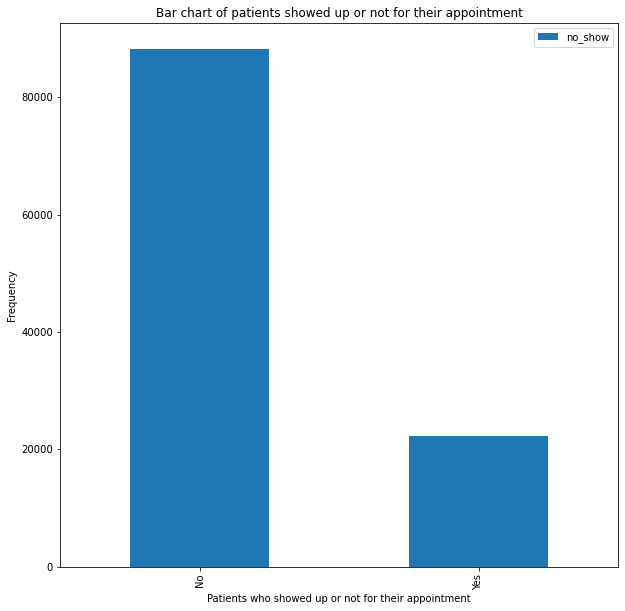

In [33]:
df["no_show"].value_counts().plot.bar(figsize=(10,10))
plt.xlabel("Patients who showed up or not for their appointment")
plt.ylabel("Frequency")
plt.title("Bar chart of patients showed up or not for their appointment")
plt.legend();

No in the above plot went patient showed up for the appointment whereas yes means the patient did not show up for their appointment.
From the above bar chart, majority of patients showed up for their appointment.

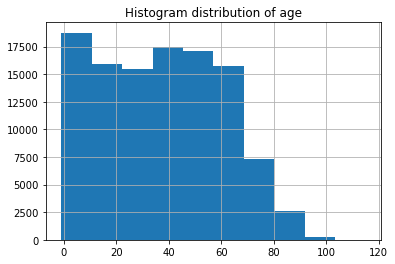

In [36]:
df["age"].hist();
plt.title("Histogram distribution of age");

From the histogram distribution above, above half of the patients are about 40 years with oldest patient being less than 120 years.

### Research Question 1 (What is the relationship between gender and patient appointment?)

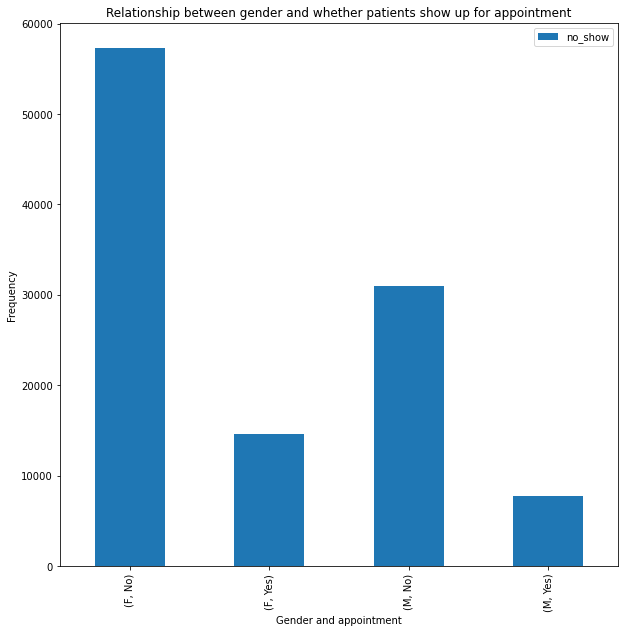

In [38]:
df.groupby("gender")["no_show"].value_counts().plot(kind="bar", figsize=(10,10));
plt.xlabel("Gender and appointment")
plt.ylabel("Frequency")
plt.title("Relationship between gender and whether patients show up for appointment")
plt.legend();

##NB: No means patient showed up for the appointment and yes means the patient did not show up for the appointment.

From the above bar chart, more females showed up for their appointment compared to males. However, there are more females in the dataset compared to males. This may have influenced the result shown above. As such, a bar chart chart will be plotted using the proportions of males and females to explore this relationship further.

In [40]:
df["gender"].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

The above count shows the number of females compared to males in the dataset.

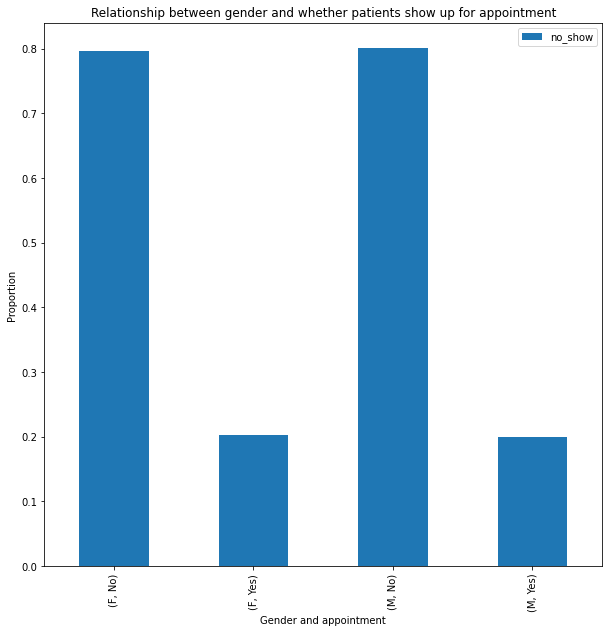

In [41]:
df.groupby("gender")["no_show"].value_counts(normalize=True).plot(kind="bar", figsize=(10,10));
plt.xlabel("Gender and appointment")
plt.ylabel("Proportion")
plt.title("Relationship between gender and whether patients show up for appointment")
plt.legend();

The proportions show that eqial number of males and females showed up for their scheduled appointment as well as fail to show up for their scheduled appointment. Gender did not have any association with whether patient showed up for their appointment or not. Males and females have similar likelihood of showing up or not showing up for scheduled appointments.

### Research Question 2  (What is the relationship between patient receiving sms and showing up for appointment?)

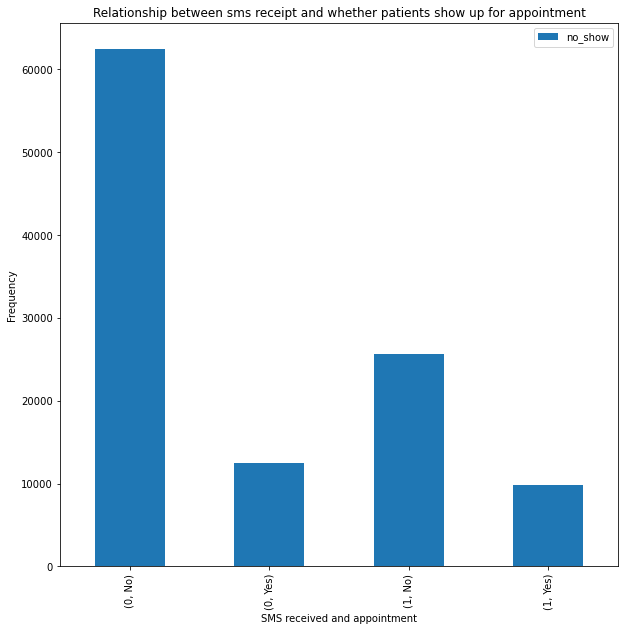

In [42]:
df.groupby("sms_received")["no_show"].value_counts().plot(kind="bar", figsize=(10,10));
plt.xlabel("SMS received and appointment")
plt.ylabel("Frequency")
plt.title("Relationship between sms receipt and whether patients show up for appointment")
plt.legend();

From the above visualisation, patients who did not receive sms alert showed up for the appointment compared to patients who did receive an sms alert. However the frequency of patient who did not receive sms alert were more than patients who received sms alert as shown in the count below. As such, proportions will be plotted to investigate this relationship further.

In [19]:
df["sms_received"].value_counts()

0    72402
1    34585
Name: sms_received, dtype: int64

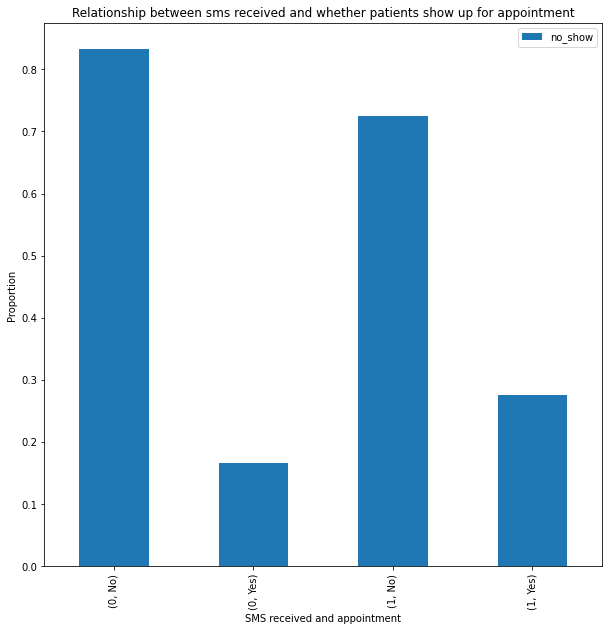

In [44]:
df.groupby("sms_received")["no_show"].value_counts(normalize=True).plot(kind="bar", figsize=(10,10));
plt.xlabel("SMS received and appointment")
plt.ylabel("Proportion")
plt.title("Relationship between sms received and whether patients show up for appointment")
plt.legend();

Similar to the plot above using frequencies, receiving sms alert did not make patient show up for appointments. More patients who received sms alert did not show up for their appointments compared to patients who did not receive sms alerts.

### Research Question 3 (Does having diabetes make patient show up for appointment?)

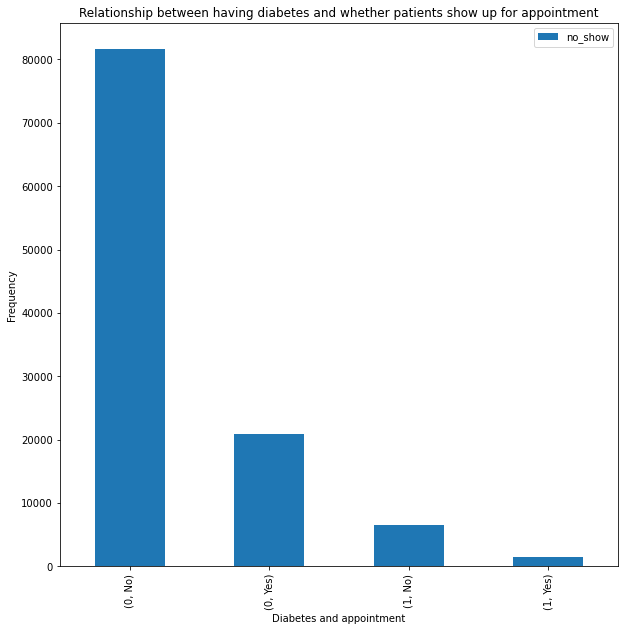

In [46]:
df.groupby("diabetes")["no_show"].value_counts().plot(kind="bar", figsize=(10,10));
plt.xlabel("Diabetes and appointment")
plt.ylabel("Frequency")
plt.title("Relationship between having diabetes and whether patients show up for appointment")
plt.legend();

From the above plot, patient with diabetes were less likely to show up or not show up for appointments compared with patients with diabetes. However, the frequency count below shows that patients without diabetes were greater in number that patients with diabetes. As such, plottting the proportions may show an informative visualisation.

In [22]:
df["diabetes"].value_counts()

0    99044
1     7943
Name: diabetes, dtype: int64

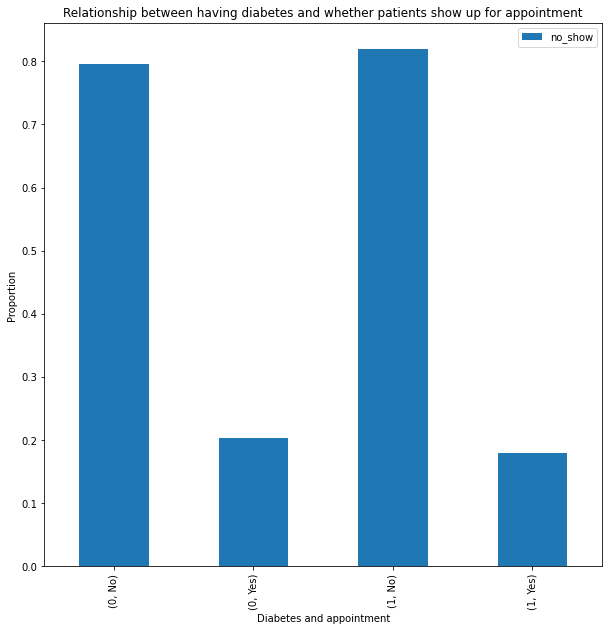

In [47]:
df.groupby("diabetes")["no_show"].value_counts(normalize=True).plot(kind="bar", figsize=(10,10));
plt.xlabel("Diabetes and appointment")
plt.ylabel("Proportion")
plt.title("Relationship between having diabetes and whether patients show up for appointment")
plt.legend();

The visualisation above interestingly shows that the a greater proportion of patients with diabetes show up for appointments compared with patients without diabetes. Additionally, patients with diabetes had a lesser proportion of patients not showing for an appointment.

In [24]:
df.groupby("diabetes")["age"].mean()

diabetes
0    36.467035
1    61.372529
Name: age, dtype: float64

In [25]:
df.groupby("sms_received")["age"].mean()

sms_received
0    38.234552
1    38.486772
Name: age, dtype: float64

In [26]:
df.groupby("gender")["age"].mean()

gender
F    39.849183
M    35.400418
Name: age, dtype: float64

The above information shows that patient with diabetes were older than patients without diabetes. This was similar for patients who did receive an sms alert and female patients. This leads us to a fourth question.

### Research Question 4 (Did age play a role in patient showing up for appointments?)

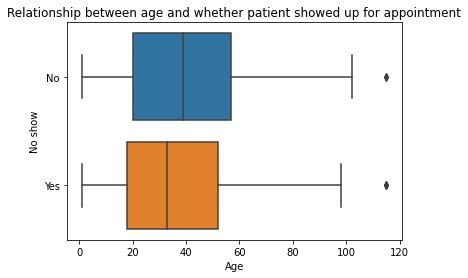

In [27]:
sns.boxplot(x="age",y="no_show",data=df);
plt.xlabel("Age")
plt.ylabel("No show")
plt.title("Relationship between age and whether patient showed up for appointment");

From the boxplot above, patient who showed for appointments were on average older than patient who did not show up for appointment. Numeric data is shown below.

In [28]:
df.groupby("no_show")["age"].median() #Median was used an not mean because the age variable is skewed as shown in the histogram below

no_show
No     39.0
Yes    33.0
Name: age, dtype: float64

Median was used an not mean because the age variable is skewed as shown in the histogram above for age.

<a id='conclusions'></a>
## Conclusions

In conclusion, gender and receiving sms alert did not have an association with whether patient showed up for appointments or not. This suggests that the gender of a patient did not influence their showing up for their hospital appointment. Also, sending sms messages to patients was not a factor that influenced whether patient showed up for their appointment or not. However, older patients on average and patients living with diabetes showed up for appointments in greater proportions compared to their controls. This association does not imply causation.

## Limitations

The findings from this project does not infer the significance of these relationships and as such conclusions reached may be subject to change with additional statistical test of inferences. 